In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import random
from cnn_forward import *

seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [4]:
x_train = x_train/255.0
x_val = x_val/255.0
x_test = x_test/255.0

In [5]:
model = models.Sequential([
    layers.Conv2D(10, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

model.summary()

model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

c:\Users\konst\.conda\envs\waruds\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 10)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2250)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        22,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,790 (89.02 KB)

 Trainable params: 22,790 (89.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3259 - loss: 1.8970 - val_accuracy: 0.4900 - val_loss: 1.4887
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5033 - loss: 1.4271 - val_accuracy: 0.5268 - val_loss: 1.3641
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5390 - loss: 1.3206 - val_accuracy: 0.5396 - val_loss: 1.3095
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5585 - loss: 1.2662 - val_accuracy: 0.5486 - val_loss: 1.2801
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5716 - loss: 1.2301 - val_accuracy: 0.5562 - val_loss: 1.2591
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5803 - loss: 1.2024 - val_accuracy: 0.5636 - val_loss: 1.2423
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5901 - loss: 1.1795 - val_accuracy: 0.5698 - val_loss: 1.2292
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5974 - loss: 1.1597 - val_accuracy: 0.

In [6]:
y_pred_tensorflow=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [7]:
y_pred_tensorflow=np.argmax(y_pred_tensorflow, axis=1) # Hasil klasifikasi dalam integer

In [15]:
from sklearn.metrics import f1_score

f1_tf = f1_score(y_test, y_pred_tensorflow, average='macro')
print("F1 Score (Macro):", f1_tf)

F1 Score (Macro): 0.5874359185733187


In [9]:
model_2 = models.Sequential([
    layers.Conv2D(10, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])
model_2.summary()

c:\Users\konst\.conda\envs\waruds\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 10)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2250)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        22,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,790 (89.02 KB)

 Trainable params: 22,790 (89.02 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model_2.load_weights('cnn.weights.h5')

In [11]:
# implementasi from scratch
W_conv = np.array(model_2.get_weights()[0])
b_conv = np.array(model_2.get_weights()[1])

W_dense = np.array(model_2.get_weights()[2])
b_dense = np.array(model_2.get_weights()[3])

In [12]:
def predict_scratch(X, w_conv, b_conv, w_dense, b_dense):
    conv_out = conv2d_forward(x_test, W_conv, b_conv)
    pooled = max_pooling2d_forward(conv_out)
    flattened = flatten(pooled)
    dense_output = dense_forward(flattened, W_dense, b_dense, softmax)
    return np.argmax(dense_output, axis=1)    

In [13]:
y_scratch = predict_scratch(x_test, W_conv, b_conv, W_dense, b_dense)

100%|██████████| 10000/10000 [01:27<00:00, 113.75it/s]


In [16]:
from sklearn.metrics import f1_score

f1_scratch = f1_score(y_test, y_scratch, average='macro')
print("F1 Score (Macro):", f1_scratch)

F1 Score (Macro): 0.5859761330968082


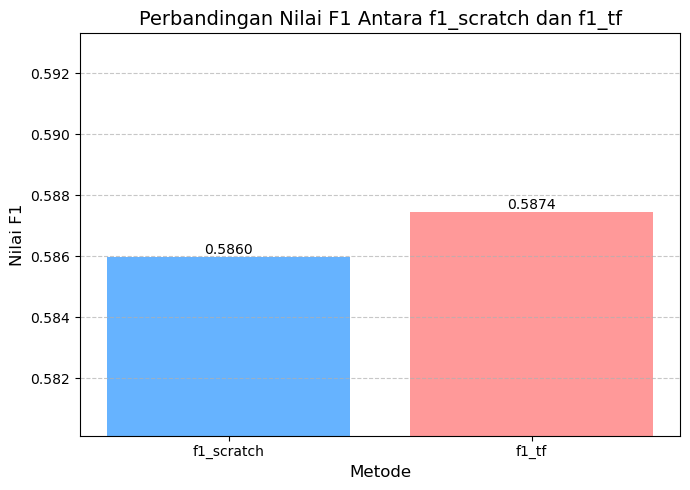

In [20]:
labels = ['f1_scratch', 'f1_tf']

values = [f1_scratch, f1_tf]

plt.figure(figsize=(7, 5))
plt.bar(labels, values, color=['#66b3ff', '#ff9999'])

plt.title('Perbandingan Nilai F1 Antara f1_scratch dan f1_tf', fontsize=14)
plt.xlabel('Metode', fontsize=12)
plt.ylabel('Nilai F1', fontsize=12)

plt.ylim(min(values) * 0.99, max(values) * 1.01) 

for i, v in enumerate(values):
    plt.text(i, v, f"{v:.4f}", ha='center', va='bottom', fontsize=10, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()